# BDAT 1004 Problem set 3

Name: Vinay Shukla  
Stu no.: 200472382  

### Libraries

Importing all the useful libraries 

## Question 3

Housing  
Step 1. Import the necessary libraries  
Step 2. Create 3 different Series, each of length 100, as follows:  
• The first a random number from 1 to 4  
• The second a random number from 1 to 3  
• The third a random number from 10,000 to 30,000  
Step 3. Create a DataFrame by joinning the Series by column  
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter  
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it  
to 'bigcolumn'  
Step 6. Ops it seems it is going only until index 99. Is it true?  
Step 7. Reindex the DataFrame so it goes from 0 to 299  

## Answer

In [129]:
# importing the librries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import seaborn as sns
import seaborn as sns
sns.set(color_codes=True)
import cufflinks as cf

In [3]:
#creating 3 different series

Bed = pd.Series(np.random.randint(2,4,100))
Bath = pd.Series(np.random.randint(1,3,100))
Price = pd.Series(np.random.randint(11111, 22222, 100))

In [4]:
#Calling a Dataframe

Que3 = pd.DataFrame({'Bed': Bed, 'Bath': Bath,'Price': Price})

In [5]:
Que3

,Bed,Bath,Price
0,2,1,12074
1,3,1,19186
2,2,1,19011
3,3,1,20960
4,2,2,13444
...,...,...,...
95,2,2,11441
96,3,1,14834
97,3,1,21881
98,2,1,19074


In [6]:
#Reanaming the columns

Que3 = Que3.rename(columns={'Bed':'bedrs', 'Bath': 'bathrs', 'Price': 'price_sqr_meter'})

In [7]:
Que3


,bedrs,bathrs,price_sqr_meter
0,2,1,12074
1,3,1,19186
2,2,1,19011
3,3,1,20960
4,2,2,13444
...,...,...,...
95,2,2,11441
96,3,1,14834
97,3,1,21881
98,2,1,19074


In [8]:
#creating a "bigcolumn"

bigcolumn = pd.DataFrame(Bed.append(Bath.append(Price)))

In [9]:
bigcolumn

,0
0,2
1,3
2,2
3,3
4,2
...,...
95,11441
96,14834
97,21881
98,19074


In [10]:
## Reseting the index(as it copoies the index of all three of them)

bigcolumn.reset_index()

,index,0
0,0,2
1,1,3
2,2,2
3,3,3
4,4,2
...,...,...
295,95,11441
296,96,14834
297,97,21881
298,98,19074


## Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question
You should be able to perform all of these operations without using a for loop or
other looping construct.


Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address  
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.  
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.  
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].  
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.  
Step 7. Compute how many non-missing values there are in total.  
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.  
A single number for the entire dataset.  
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days  
A different set of numbers for each location.  
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean  
windspeed and standard deviations of the windspeeds across all the locations at each
day.  
A different set of numbers for each day.  
Step 11. Find the average windspeed in January for each location.  
Treat January 1961 and January 1962 both as January.  
Step 12. Downsample the record to a yearly frequency for each location.  
Step 13. Downsample the record to a monthly frequency for each location.  
Step 14. Downsample the record to a weekly frequency for each location.  
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the  
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.  


## Answer

In [11]:
## importing the data

data = pd.read_table('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep="\s+")


In [12]:
## calling the data

data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [13]:
## getting the unique values

data.Yr.unique()

array([61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78], dtype=int64)

In [14]:
## Cleaning for proper date time index

data['Yr'] = data.Yr + 1900
date_str = "{}/{}/{}"
date = data.apply(lambda x: date_str.format(np.int(x.Yr), np.int(x.Mo), np.int(x.Dy)), axis=1)
date = pd.to_datetime(date)
data.insert(0, 'Date', date)
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)


In [15]:
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [16]:
data['Date'].max()

Timestamp('1978-12-31 00:00:00')

The max year value is 1978 So we don't have any value for year 2061

In [18]:
data.dtypes

Date    datetime64[ns]
RPT            float64
VAL            float64
ROS            float64
KIL            float64
SHA            float64
BIR            float64
DUB            float64
CLA            float64
MUL            float64
CLO            float64
BEL            float64
MAL            float64
dtype: object

We can see the Date datatype is datetime64[ns]

In [19]:
data.set_index('Date', inplace=True)

In [20]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [23]:
# Cheking the total number of nnull values.

data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [24]:
# number of non missing value

data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [25]:
## filling null values

data.fillna(value=data.median(), inplace=True)

If we try to check the null values now the result will be different.

In [26]:
data.isnull().sum()

RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

As you can see all the null values have been filled.

In [29]:
#calling a new DataFrame with new columns 

loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

In [30]:
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362391,5.615883
VAL,0.21,33.37,10.644098,5.266164
ROS,1.50,33.84,11.660301,5.007705
KIL,0.00,28.46,6.306045,3.604472
SHA,0.13,37.54,10.455683,4.935382
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797075,4.976434
CLA,0.00,31.08,8.494927,4.498770
MUL,0.00,25.88,8.493442,4.165927
CLO,0.04,28.21,8.707268,4.503615


In [31]:
# Creating a new DataFrame again but this time calculation should be done column vise

day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

In [32]:
day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,12.763333,2.819911
1961-01-02,6.50,17.54,11.239167,3.059172
1961-01-03,6.17,18.50,11.345000,3.658043
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [33]:
# average windspeed on january

(data['1961-01'].mean() + data['1961-02'].mean())/2

RPT    15.504804
VAL    13.452517
ROS    13.873664
KIL     8.421601
SHA    12.426555
BIR     9.762782
DUB    11.537776
CLA    10.526907
MUL    10.453618
CLO    11.410853
BEL    16.232091
MAL    15.057506
dtype: float64

In [34]:
## Yearly frequency                // Refered from google

data[np.logical_and(data.index.month == 1, data.index.day == 1)]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,9.96,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71


In [35]:
## monthly frequency

data[data.index.day == 1]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,9.96,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,8.17,12.21,20.62,15.00
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09


In [36]:
#Weekly frequency

data[(data.index.day - 1) % 7 == 0]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,9.96,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,11.71,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-01,21.29,16.29,24.04,12.79,18.21,19.29,21.54,17.21,16.71,17.83,17.75,25.70
1978-12-08,12.92,12.54,11.25,3.37,6.50,5.96,10.34,6.17,6.63,6.75,9.54,17.33
1978-12-15,13.13,8.92,16.54,6.92,6.00,4.00,12.67,5.88,7.67,6.08,5.50,17.16


## Question 5

Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address.  
Step 3. Assign it to a variable called chipo.  
Step 4. See the first 10 entries  
Step 5. What is the number of observations in the dataset?   
Step 6. What is the number of columns in the dataset?  
Step 7. Print the name of all the columns.  
Step 8. How is the dataset indexed?  
Step 9. Which was the most-ordered item?  
Step 10. For the most-ordered item, how many items were ordered?  
Step 11. What was the most ordered item in the choice_description column?  
Step 12. How many items were orderd in total?  
Step 13.  
• Turn the item price into a float  
• Check the item price type  
• Create a lambda function and change the type of item price  
• Check the item price type  
Step 14. How much was the revenue for the period in the dataset?  
Step 15. How many orders were made in the period?  
Step 16. What is the average revenue amount per order?  
Step 17. How many different items are sold?   

## Answer

In [37]:
### importing the data

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter='\t')

In [38]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [40]:
# first 10 values

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [39]:
# number of columns and rows in chipo

chipo.shape

(4622, 5)

The number of raws are the number of observation. That i why no. of observation is 4622 and number of column is 5.

In [41]:
# name of all the columns.

list(chipo.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [42]:
# How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [58]:
# the maximum order for an item is the most ordered item

chipo_grp = chipo.groupby('item_name')['quantity']
orders = chipo_grp.sum()

In [66]:
# Most ordered item

orders.idxmax()

'Chicken Bowl'

In [67]:
orders.max()

761

Most ordered item is chicken bowl which is ordered 761 times.

In [68]:
# most ordered item in choice_description

order_cd = chipo.groupby('choice_description')['quantity']

In [71]:
orders = order_cd.sum()

## Question 6

create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend.


In [75]:
Que6 = pd.read_csv('E:\Big Data Analytics\BDAT 1004 DATA PROGRAMMING\ProblemSet3\Que6.csv')

In [76]:
Que6

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [77]:
Que6['marriages_per_capita'] = Que6.Marriages / Que6.Population

In [79]:
Que6['divorces_per_capita'] = Que6.Divorces / Que6.Population

In [80]:
Que6

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,marriages_per_capita,divorces_per_capita
0,1867,357000.0,10000.0,36970000,9.7,0.3,0.009656,0.000270
1,1868,345000.0,10000.0,37885000,9.1,0.3,0.009107,0.000264
2,1869,348000.0,11000.0,38870000,9.0,0.3,0.008953,0.000283
3,1870,352000.0,11000.0,39905000,8.8,0.3,0.008821,0.000276
4,1871,359000.0,12000.0,41010000,8.8,0.3,0.008754,0.000293
...,...,...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8,0.007282,0.002837
141,2008,2157000.0,844000.0,304543000,7.1,2.8,0.007083,0.002771
142,2009,2080000.0,840000.0,307240000,6.8,2.7,0.006770,0.002734
143,2010,2096000.0,872000.0,309776000,6.8,2.8,0.006766,0.002815


Text(0, 0.5, 'Ratio Per Capita')

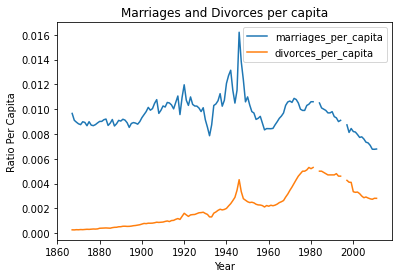

In [82]:
columns = Que6.columns.drop(['Population', 'Divorces', 'Marriages'])
fig, ax = plt.subplots()
x_data = range(Que6.Year.min(), Que6.Year.max()+1)
ax.plot(x_data, Que6['marriages_per_capita'])
ax.plot(x_data, Que6['divorces_per_capita'])
ax.set_title('Marriages and Divorces per capita')
ax.legend(['marriages_per_capita', 'divorces_per_capita'])
ax.set_xlabel('Year')
ax.set_ylabel('Ratio Per Capita')

## Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000

In [85]:
Que7 = Que6[Que6.Year.isin([1900, 1950, 2000])]

In [86]:
Que7

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,marriages_per_capita,divorces_per_capita
33,1900,709000.0,56000.0,76094000,9.3,0.7,0.009317,0.000736
83,1950,1667000.0,385000.0,151684000,11.0,2.5,0.010990,0.002538
133,2000,2315000.0,944000.0,282398000,8.2,3.3,0.008198,0.003343


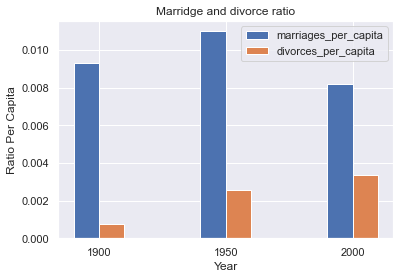

In [138]:
# Refered from bar graph tutorial

column = np.arange(len(Que7)) 
fig, ax = plt.subplots()
ax.bar(column - width/2, Que7['marriages_per_capita'], width, label='marriages_per_capita')
ax.bar(column + width/2, Que7['divorces_per_capita'], width, label='divorces_per_capita')
ax.set_ylabel('Ratio Per Capita')
ax.set_xlabel('Year')
ax.set_title('Marridge and divorce ratio')
ax.set_xticks(column)
ax.set_xticklabels(('1900', '1950', '2000'))
ax.legend()

## Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name.

In [95]:
Que8 = pd.read_csv('E:\Big Data Analytics\Ques8.csv')

In [133]:
Que8

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


In [99]:
Que8 = Que8.sort_values(by='Count', ascending=False)

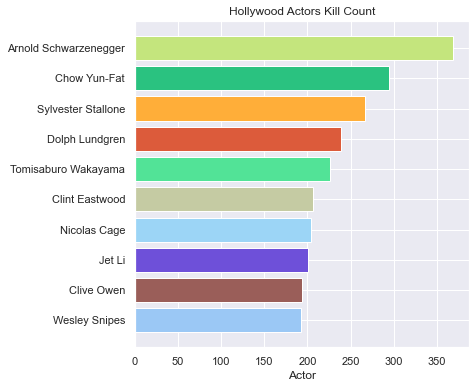

In [136]:
colours = ['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5']
fig, ax = plt.subplots()

y_pos = np.arange(len(Que8))
ax.barh(y_pos, Que8.Count, align='center',color=colours)
ax.set_yticks(y_pos)
ax.set_yticklabels(Que8.Actor)
ax.invert_yaxis()
ax.set_xlabel('Kill Count')
ax.set_xlabel('Actor')
ax.set_title('Hollywood Actors Kill Count')

fig.set_figheight(6)
plt.show()

## Question 9

Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated

In [105]:
Que9 = pd.read_csv('E:\Big Data Analytics\Que9.csv')

In [132]:
Que9

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [108]:
Que9.Cause_of_Death.unique()

array(['Possibly assassinated', 'Assassinated', 'Suicide',
       'Natural causes', 'Illness', 'Executed', 'Killed in battle',
       'Died in captivity'], dtype=object)

In [116]:
Ques9 = Que9.Cause_of_Death.value_counts()

In [128]:
fig = {
  "data": [
    {
      "values": list(Ques9.values),
      "labels": list(Ques9.index),
      "domain": {"x": [.3, .3]},
      "name": "Cause of death",
      "hoverinfo":"label+percent",
      "hole": 0,
      "type": "pie"
    },],
  "layout": {
        "title":"Roman Emperors deaths",
        "annotations": [
            { "font": { "size": 30},
              "showarrow": False,
              "text": "",
                "x": 1,
                "y": 1                     
            },
        ]
    }
}
iplot(fig)

## Question 10

Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009

In [130]:
Que10 = pd.read_csv('E:\Big Data Analytics\Que10.csv')

In [131]:
Que10

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

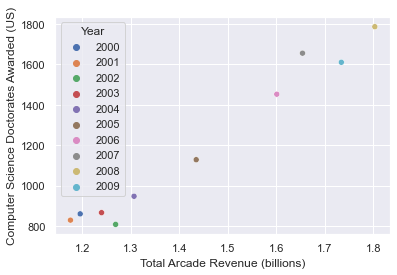

In [134]:
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', palette="deep",
                hue='Year', data=Que10)